<a href="https://colab.research.google.com/github/VAbhishek12/excelr/blob/main/RandomForest/RF(Fraud_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# prompt: import a file in colab

from google.colab import files
uploaded = files.upload()


Saving Fraud_check.csv to Fraud_check.csv


In [13]:
import numpy as np
import pandas as pd
df = pd.read_csv("Fraud_check.csv")
df.shape

(600, 6)

In [14]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [15]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [17]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


array([[<Axes: title={'center': 'Taxable.Income'}>,
        <Axes: title={'center': 'City.Population'}>],
       [<Axes: title={'center': 'Work.Experience'}>, <Axes: >]],
      dtype=object)

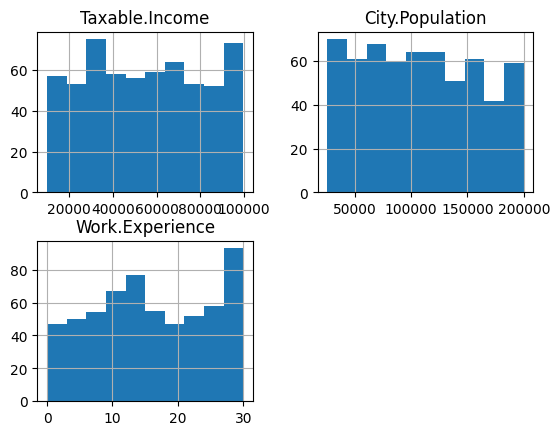

In [18]:
df.hist()

<Axes: >

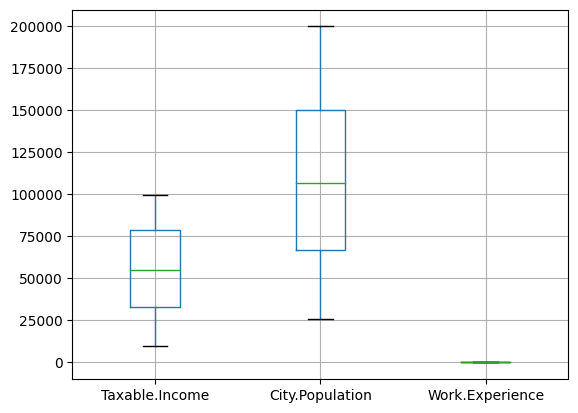

In [19]:
df.boxplot()

In [20]:
df.isnull()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


In [21]:
#taxable income is less than or equal to 30,000 as risky other wise it as good create an column for thatif it is not

for i in range(len(df)):
  if df['Taxable.Income'][i] <= 30000:
    df['Taxable.Income'][i] = 'Risky'
  else:
    df['Taxable.Income'][i] = 'Good'

df.head()

<ipython-input-21-addd325a231b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Taxable.Income'][i] = 'Good'


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [22]:
# label encoding of the object variables....

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object'):
  df[col] = le.fit_transform(df[col])

df.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [25]:
# Data Partition...

from sklearn.model_selection import train_test_split

X = df.drop(['Taxable.Income'],axis = 1) # drop unnecessory column
Y = df['Taxable.Income'] # target variable..

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30,random_state = 42)

#printing the shape..

print("X_train shape",X_train.shape)
print("Y_train shape",Y_train.shape)
print("X_test shape",X_test.shape)
print("Y_test shape",Y_test.shape)

X_train shape (420, 5)
Y_train shape (420,)
X_test shape (180, 5)
Y_test shape (180,)


In [29]:
# decision tree classifier to fit model

from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='gini')

# Fit the model to the training data
clf = clf.fit(X_train, Y_train)

In [31]:
# calculating the acuuracy of the testing and training...

train_accuracy = clf.score(X_train,Y_train)

test_accuracy = clf.score(X_test,Y_test)

print("Training Accuracy",train_accuracy)
print("Testing Accuracy",test_accuracy)

Training Accuracy 1.0
Testing Accuracy 0.65


In [32]:
# cross validation method
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="gini",max_depth=11)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

In [33]:
print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))
# max_depth=17    Cross validation Training score:  0.99 , Cross validation Test score:  0.65
# max_depth=15   Cross validation Training score:  0.97 , Cross validation Test score:  0.66
# max_depth=13    Cross validation Training score:  0.95 , Cross validation Test score:  0.67
# max_depth=12    Cross validation Training score:  0.94, Cross validation Test score:  0.67
# max_depth=11    Cross validation Training score:  0.92 , Cross validation Test score:  0.69

Cross validation Training score:  0.92
Cross validation Test score:  0.69


In [35]:
# print the number of nodes and depth of tree

print("The number of nodes in the tree is:", dt_model.tree_.node_count)
print("The depth of the tree is:", dt_model.tree_.max_depth)


The number of nodes in the tree is: 153
The depth of the tree is: 11


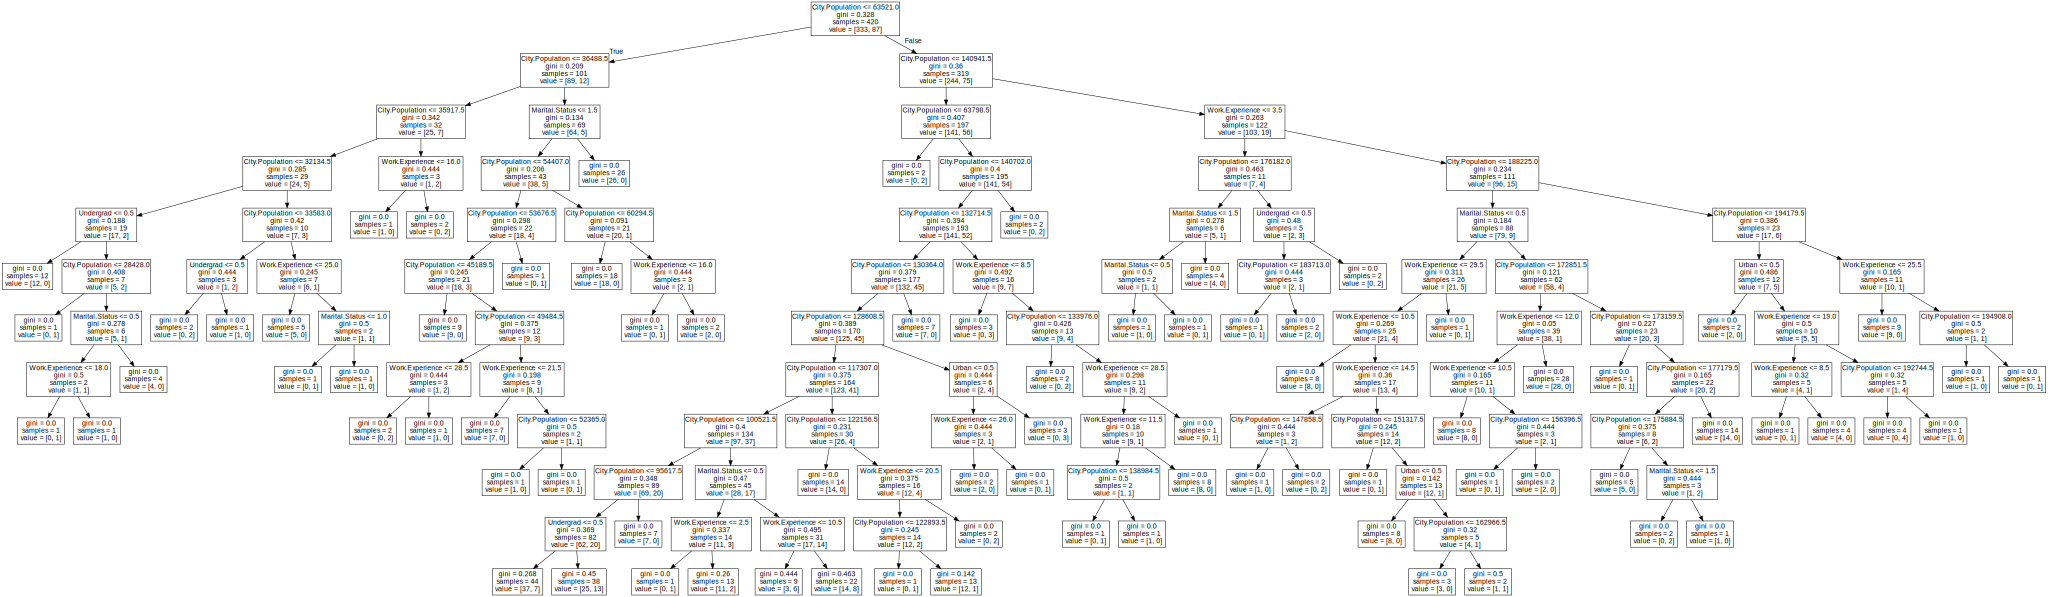

In [36]:
# printing the decision tree graph..

#!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_model, out_file=None, feature_names=X.columns)
graph = graphviz.Source(dot_data)
graph

In [41]:
# Bagging classifier

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.25, random_state=0)

from sklearn.ensemble import BaggingClassifier

# Create a BaggingClassifier with 10 estimators
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=11),
    n_estimators=100,
    max_features = 0.7, max_samples = 0.6)

# Fit the model to the training data
bag_clf.fit(X_train, Y_train)

# Predict the labels for the training and test data
Y_pred_train_bag = bag_clf.predict(X_train)
Y_pred_test_bag = bag_clf.predict(X_test)

# Calculate the accuracy for the training and test data
accuracy_train_bag = accuracy_score(Y_train, Y_pred_train_bag)
accuracy_test_bag = accuracy_score(Y_test, Y_pred_test_bag)

# Print the accuracies
print("Training accuracy (bagging):", accuracy_train_bag)
print("Testing accuracy (bagging):", accuracy_test_bag)


Training accuracy (bagging): 0.8377777777777777
Testing accuracy (bagging): 0.7533333333333333


In [42]:
# cross validation method  --> Bagging Classifier

from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    bag_clf.fit(X_train,Y_train)
    Y_pred_train = bag_clf.predict(X_train)
    Y_pred_test = bag_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))

Cross validation Training score:  0.84
Cross validation Test score:  0.79


In [43]:
# Random Forest classifier

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)


from sklearn.ensemble import RandomForestClassifier
# Create a RandomForestClassifier with 10 estimators
Rf_clf = RandomForestClassifier(n_estimators=100,
    max_features = 0.7, max_samples = 0.6)

# Fit the model to the training data
Rf_clf.fit(X_train, Y_train)

# Predict the labels for the training and test data
Y_pred_train_Rf = Rf_clf.predict(X_train)
Y_pred_test_Rf = Rf_clf.predict(X_test)

# Calculate the accuracy for the training and test data
accuracy_train_Rf = accuracy_score(Y_train, Y_pred_train_Rf)
accuracy_test_Rf = accuracy_score(Y_test, Y_pred_test_Rf)

# Print the accuracies
print("Training accuracy (Rf):", accuracy_train_Rf)
print("Testing accuracy (Rf):", accuracy_test_Rf)

Training accuracy (Rf): 0.9488888888888889
Testing accuracy (Rf): 0.7533333333333333


In [45]:
# cross validation method  --> Random Forests

from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    Rf_clf.fit(X_train,Y_train)
    Y_pred_train = Rf_clf.predict(X_train)
    Y_pred_test = Rf_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))

Cross validation Training score:  0.95
Cross validation Test score:  0.77


In [48]:
# Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=0)


# Create a GradientBoostingClassifier with 10 estimators
GB_clf = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01)

# Fit the model to the training data
GB_clf.fit(X_train, Y_train)

# Predict the labels for the training and test data
Y_pred_train_GB = GB_clf.predict(X_train)
Y_pred_test_GB = GB_clf.predict(X_test)

# Calculate the accuracy for the training and test data
accuracy_train_GB = accuracy_score(Y_train, Y_pred_train_GB)
accuracy_test_GB = accuracy_score(Y_test, Y_pred_test_GB)

# Print the accuracies
print("Training accuracy (GB):", accuracy_train_GB)
print("Testing accuracy (GB):", accuracy_test_GB)

# cross validation method  --> Gradient Boosting


training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    GB_clf.fit(X_train,Y_train)
    Y_pred_train = GB_clf.predict(X_train)
    Y_pred_test = GB_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))

Training accuracy (GB): 0.8119047619047619
Testing accuracy (GB): 0.7555555555555555
Cross validation Training score:  0.8
Cross validation Test score:  0.79


In [49]:
#code using gridsearchcv method

from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [0.7, 0.8, 0.9],
    'learning_rate': [0.01,0.1,0.5,1]}

# Create a BaggingClassifier instance
GB_clf = GradientBoostingClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(GB_clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict the labels for the test data using the best model
Y_pred_train = best_model.predict(X_train)
Y_pred_test = best_model.predict(X_test)

# Calculate the accuracy of the best model
training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

# Print the accuracy of the best model
print("Train error (best model):", train_accuracy)
print("Test error (best model):", test_accuracy)

Best parameters: {'learning_rate': 0.01, 'max_features': 0.7, 'n_estimators': 100}
Train error (best model): 1.0
Test error (best model): [0.8, 0.7888888888888889, 0.7666666666666667, 0.7944444444444444, 0.8, 0.7333333333333333, 0.7944444444444444, 0.8, 0.7777777777777778, 0.7611111111111111, 0.7833333333333333, 0.8388888888888889, 0.8277777777777777, 0.8055555555555556, 0.8388888888888889, 0.8388888888888889, 0.7666666666666667, 0.7277777777777777, 0.7833333333333333, 0.7888888888888889, 0.8055555555555556, 0.7833333333333333, 0.8111111111111111, 0.8, 0.7944444444444444, 0.7833333333333333, 0.7944444444444444, 0.7555555555555555, 0.7777777777777778, 0.7722222222222223, 0.7888888888888889, 0.8166666666666667, 0.7888888888888889, 0.8111111111111111, 0.7888888888888889, 0.7611111111111111, 0.7944444444444444, 0.7777777777777778, 0.7833333333333333, 0.7777777777777778, 0.7944444444444444, 0.7888888888888889, 0.7777777777777778, 0.7555555555555555, 0.8111111111111111, 0.7944444444444444, 0

In [50]:
# AdaBoost CLassifier
from sklearn.ensemble import AdaBoostClassifier
dt_model = AdaBoostClassifier(n_estimators=200,learning_rate=0.01)

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))


print("Ada Boosting-Cross validation Training error: ", np.mean(training_accuracy).round(2))
print("Ada Boosting-Cross validation Test error: ", np.mean(test_accuracy).round(2))


Ada Boosting-Cross validation Training error:  0.79
Ada Boosting-Cross validation Test error:  0.79
